<a href="https://colab.research.google.com/github/vishmaria/calculo-numerico/blob/main/MMQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# Unidade 5 - Aproximação de funções




Nesta unidade, vamos estudar métodos para aproximar funções e dados tabelados. Veremos duas maneiras de aproximar funções: a **Interpolação** e o **Método dos Mínimos Quadrados**. A seguir, apresentamos alguns exemplos de resolução em *Python*. Vamos utilizar as bibliotecas [numpy](https://numpy.org/) e [scipy](https://scipy.github.io/devdocs/index.html).

**Motivação:**

Podemos estar interessados em extrair informações de um conjunto de dados de censos demográficos, que em geral ocorre a cada 10 anos. Como estimar a população em anos intermediários?

Podemos também aproximar funções $f(x)$ contínuas por uma combinação de polinômios ou funções trigonométricas, por exemplo.

Existem duas classes de métodos:


*   **Método dos Mínimos Quadrados** (MMQ): nosso objetivo é minimizar o resíduo entre os dados e uma função aproximadora.
*   **Interpolação Polinomial**: nesse caso exigimos que o polinômio aproximador "passe" pelos dados a serem aproximados.



# Método dos Mínimos Quadrados


**Problema Discreto:**

Objetivo: Minimizar resíduo (erro).

Para obter a melhor aproximação vamos minimizar a função:

$$  r({\bf a}) = \sum_{i=1}^m r_i({\bf a})^2,$$

sendo o resíduo $r_i({\bf a}) = f(x_i,{\bf a}) - y_i$, com $(x_i,y_i)$ dados e $m$ tamanho dos vetores $x$ e $y$.

Para ajustar os parâmetros da função $r({\bf a})$ vamos utilizar as bibliotecas *numpy* e *scipy*.

 *Assunto descrito em aula, para mais detalhes, veja material disponível no moodle.*

*Exemplo 1*

Ajustar os dados abaixo usando uma reta (Regressão linear):

$$\begin{array}{c|ccccc}
x_i & 0 & 0.25 & 0.5 & 0.75 & 1\\
\hline
y_i & 1 & 1.2840 & 1.6487 & 2.1170 & 2.7183 \\
\end{array}$$

*Solução:*

A função aproximadora é dada por $g(x)=a_0 + a_1x$. A tabela possui $5$ pontos portanto $m=5$.

[[67.5         1.94856894]
 [ 1.94856894  2.95145074]]
[69.705       4.94584248]
[1.0034159  1.01327032]
residuo =  0.0003196239999689366


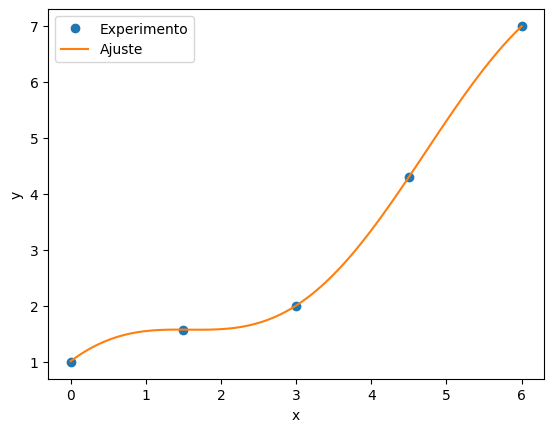

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

def flinear(x, a):
    #y = a[0] + a[1]*x
    y = a[0]*x + a[1]*np.cos(x)
    return y

def rlinear(a, x, y):
    return flinear(x, a) - y

#xi = np.array([0, 0.25, 0.5, 0.75 , 1])
#yi = np.array([1, 1.2840, 1.6487, 2.117, 2.7183])

#Exemplo 1 (aula)
#xi = np.array([0, 1, 2, 3, 4])
#yi = np.array([0, 1, 1, 4, 4])

#Exemplo 2 (aula)
xi = np.array([0, 1.5, 3, 4.5, 6])
yi = np.array([1, 1.57, 2, 4.3, 7])
m = len(xi)
v_1 = np.ones(m)

#Sistema para o ajuste por reta
A = np.zeros((2,2))
b = np.zeros(2)

# Sistema do exemplo 1
#A[0,0] = np.vdot(v_1,v_1)
#A[1,0] = np.vdot(v_1,xi)
#A[0,1] = A[1,0]
#A[1,1] = np.vdot(xi, xi)
#b[0] = np.vdot(v_1, yi)
#b[1] = np.vdot(xi, yi)

#Sistema do ajuste g(x) = a0x + a1cos(x), exemplo 2
A[0,0] = np.vdot(xi, xi)
A[1,0] = np.vdot(xi, np.cos(xi))
A[0,1] = A[1,0]
A[1,1] = np.vdot(np.cos(xi), np.cos(xi))
b[0] = np.vdot(xi, yi)
b[1] = np.vdot(np.cos(xi), yi)
print(A)
print(b)
a = np.linalg.solve(A, b)
print(a)
res = 0
for i in range(m):
   res += (rlinear(a, xi[i], yi[i])**2)
print("residuo = ", res)

x_test = np.linspace(xi[0], xi[m-1], 100)

y_lin = flinear(x_test, a)

plt.figure(1)
plt.plot(xi, yi, 'o', label='Experimento')
plt.plot(x_test, y_lin, label='Ajuste')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**Problema Contínuo**

No caso contínuo, o problema de ajuste de curvas consiste em: dada uma função $f(x)$ contínua em um intervalo $[a,b]$ e escolhidas as funções $g_0(x), g_1(x),\ldots, g_n(x)$ todas contínuas em $[a,b]$, queremos determinar $a_0,a_1,\ldots,a_n$ tais que a função $\displaystyle{g(x) = \sum_{k=0}^na_kg_k(x)}$ seja a melhor aproximação de $f(x)$ no intervalo $[a,b]$.

Determinar a *melhor aproximação*, como no caso discreto, significa minimizar a função resíduo dada por,

$$r({\bf a}) = \int_a^b[f(x) - \sum_{k=0}^na_kg_k(x)]^2dx.$$

No caso discreto, o resíduo era definido com uma soma finita, já o caso contínuo a definição do resíduo é feita por meio de uma integral em $[a,b]$. Para facilitar a notação, é comum utilizar a notação de produto escalar de duas funções.

1. Caso discreto $\displaystyle{<f,g> = \sum_{i=0}^m f(x_i)g(x_i)}$.
2. Caso contínuo $\displaystyle{<f,g> = \int_a^bf(x)g(x)dx}.$

Importante, lembrar que o produto escalar entre funções satisfaz as propriedades:
1. Linearidade: $\displaystyle{<ag_1+a_2g_2, f> = a_1<g_1,f>+a_2<g_2,f>}.$
2. Comutatividade: $\displaystyle{<f,g> = <g,f>}.$
3. Não negatividade: $\displaystyle{<g,g> \ge 0}$ e $\displaystyle{<g,g> = 0 \Leftrightarrow g \equiv 0}$.

**1. Exercício:** Verifique estas propriedades para os produtos escalares definidos para o caso discreto e para o caso contínuo.

Como fizemos para o caso discreto, queremos determinar os parâmetros $a_0,a_1,\ldots,a_n$ que minimizam o resíduo, ou seja, $\displaystyle{\dfrac{\partial r}{\partial a_j} = 0,}$ com $j=0,1,\ldots,n$. Assim, para cada $j$ temos uma equação da forma,
$$\int_a^b2[f(x) - \sum_{k=0}^na_kg_k(x)]g_j(x)dx = 0, \mbox{com } j = 0,\ldots, n.$$
Pelas propriedades de produto escalar, temos
$$\int_a^bf(x)g_j(x)dx -\sum_{k=0}^na_k\int_a^bg_k(x)g_j(x)dx = 0,$$
que implica em,
$$a_0\int_a^bg_0(x)g_j(x)dx + a_1\int_a^bg_1(x)g_j(x)dx + \ldots + a_n\int_a^bg_n(x)g_j(x)dx = \int_a^bf(x)g_j(x)dx.$$
Dessa forma obtemos o sistema normal,
$$\left(\begin{array}{cccc}
<g_0,g_0> & <g_1,g_0> & \ldots & <g_n,g_0> \\
<g_0,g_1> & <g_1,g_1> & \ldots & <g_n,g_1> \\
\vdots & & \ddots & \vdots \\
<g_0,g_n> & <g_1,g_n> & \ldots & <g_n,g_n>
\end{array}\right)\left(\begin{array}{c}
a_0\\
a_1\\
\vdots\\
a_n
\end{array}\right) = \left(\begin{array}{c}
<f,g_0>\\
<f,g_1>\\
\vdots\\
<f,g_n>
\end{array}\right),$$
sendo $\displaystyle{<g,f> = \int_a^bg(x)f(x)dx}$.








*Exemplo 2:*

Queremos subsituir a função $\displaystyle{f(x) = \sin\left(\frac{\pi}{4}x\right)}$ por um polinômio de grau 3, no intervalo $[0,1]$. Como a função $\displaystyle{\sin\left(\frac{\pi}{4}x\right)}$ é uma função ímpar, ou seja, $f(-x) = -f(x)$, vamos escolher um polinômio ímpar para o ajuste, $g(x) = a_0x+a_1x^3$. Isso significa, que $g_0(x) = x$ e $g_1(x) = x^3$. Assim, precisamos minimizar a função
$$r(a_0,a_1) = \int_0^1(\sin\frac{\pi}{4}x - a_0x - a_1x^3)^2dx.$$
Assim, o sistema normal é dado por,
$$\left(\begin{array}{cc}
\int_0^1x^2dx & \int_0^1x^4dx\\
\int_0^1x^4dx & \int_0^1x^6dx
\end{array}\right)
\left(\begin{array}{c}
a_0\\
\\
a_1\\
\end{array}\right) = \left(\begin{array}{c}
\int_0^1x\sin(\frac{\pi}{4}x) dx\\
\int_0^1x^3\sin(\frac{\pi}{4}x) dx
\end{array}\right),$$

Calculando as integrais (algumas por partes: $\int udv = uv -\int v du$) obtemos:

$$\begin{align}
\int_0^1x\sin(\frac{\pi}{4})dx & = -x\frac{4}{\pi}\cos(\frac{\pi}{4}x)|_0^1 + \frac{4}{\pi}\int_0^1\cos(\frac{\pi}{4}x)dx \\
& = -\frac{4}{\pi}\cos(\frac{\pi}{4})+\frac{16}{\pi^2}\sin(\frac{\pi}{4})\\
& \approx 0.2460020203444062
\end{align}$$

$$\begin{align}
\int_0^1x^3\sin(\frac{\pi}{4})dx & = -x^3\frac{4}{\pi}\cos(\frac{\pi}{4}x)|_0^1 + \frac{12}{\pi}\int_0^1 x^2\cos(\frac{\pi}{4}x)dx \\
& = -\frac{4}{\pi}\cos(\frac{\pi}{4})+\frac{12}{\pi}[\dfrac{4}{\pi}x^2\sin(\frac{\pi}{4}x)|_0^1 - \frac{8}{\pi}\int_0^1x\sin(\frac{\pi}{4}x)dx] \\
& \approx 0.14581796889606857
\end{align}$$

$$\int_0^1 x^2dx = \frac{x^3}{3}|_0^1 = \frac{1}{3}$$

$$\int_0^1 x^4dx = \frac{x^5}{5}|_0^1 = \frac{1}{5}$$

$$\int_0^1 x^6dx = \frac{x^7}{7}|_0^1 = \frac{1}{7}$$



In [13]:
import numpy as np
print(-(4/np.pi)*np.cos(np.pi/4)+(16/np.pi**2)*np.sin(np.pi/4))
print(-(4/np.pi)*np.cos(np.pi/4)+(12/np.pi)*((4/np.pi)*np.sin(np.pi/4) - (8/np.pi)*0.2460020203444062))

0.2460020203444062
0.14581796889606857


Assim,

$$\left(\begin{array}{cc}
\dfrac{1}{3} & \dfrac{1}{5}\\
\dfrac{1}{5} & \dfrac{1}{7}
\end{array}\right) \left(\begin{array}{c}
a_0\\ \\
a_1
\end{array}\right) = \left(\begin{array}{c}
0.2460020203444062\\ \\
0.14581796889606857
\end{array}\right)$$

cuja solução é $a_0 = 0.7848162$ e $a_1 = -0.07801689$.
Portanto, a função aproximadora é $g(x) = 0.7848162x -0.07801689x^3.$




[ 0.7848162  -0.07801689]


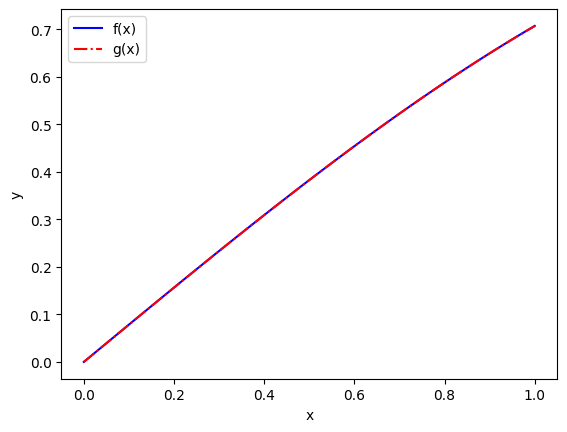

In [14]:
import numpy as np

def f(x):
  return np.sin((np.pi/4)*x)

def g(x, a):
  return a[0]*x + a[1]*x**3

A = np.array([[1/3, 1/5], [1/5, 1/7]])
b = np.array([0.2460020203444062, 0.14581796889606857])
a = np.linalg.solve(A, b)
print(a)

x = np.linspace(0,1,100)
y = f(x)
ya = g(x, a)

plt.figure(1)
plt.plot(x, y, 'b-', label='f(x)')
plt.plot(x, ya, 'r-.', label='g(x)')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**Mínimos quadrados com peso**

A formulação do Método dos Mínimos Quadrados (MMQ) usando a definição de produto escalar de funções nos permite:

1. Atribuir diferentes  graus de importância no intervalo de aproximação. Isso é feito quando incluímos uma função peso, $w(x)$ no produto escalar,



*   Discreto: $\displaystyle{<f,g> = \sum_{i=1}^mw(x_i)f(x_i)g(x_i),} $
*   Contínuo: $\displaystyle{<f,g> = \int_a^b w(x)f(x)g(x)dx,}$

sendo $w(x)$ uma função contínua e $w(x)>0$ em $[a,b]$.

*Exemplo 3:*

A tabela
$$\begin{array}{c|cccccc}
t & 1 & 2 & 3 & 4 & 5 & 6\\
\hline
R & 21.3 & 21.8 & 21.2 & 21.3 & 20.5 & 21 \\
\end{array}$$

representa os preços em reais  de um ativo financeiro em 6 meses  consecutivos $t_i=i$, com $i=1,2,\ldots,6$. Queremos estimar o comportamento dos preços usando uma função linear, $R(t)=\alpha + \beta t$. Usaremos os seguintes pesos para os meses  de 1 a 6: $w = (0.5, 0.6, 0.7, 0.8, 0.9, 1)$. Pede-se para determinar a reta que melhor se ajusta (via mínimos quadrados), segundo o produto escalar $<x,y>=\sum_{i=1}^6w_ix_iy_i$ e a volatilidade $\sigma$ da amostra é dada por $\sigma^2 = \sum_{i=1}^6w_i(R_i-R(t_i))^2$.

Obs. Resolução em sala!



[[ 4.5 17.5]
 [17.5 80.5]]
[ 95.06 367.74]
[21.73       -0.15571429]
sigma =  0.6185235877243741


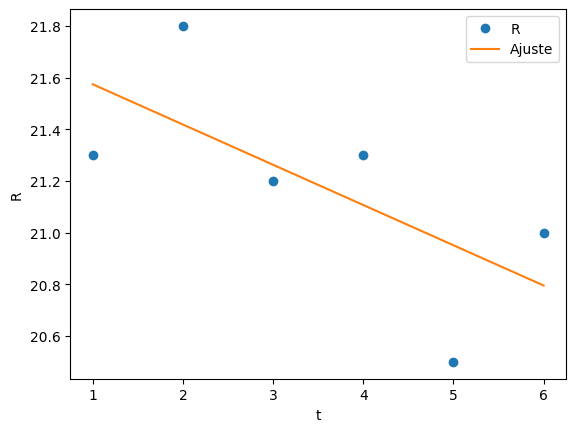

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

def flinear(x, a):
    y = a[0] + a[1]*x
    return y

def rlinear(a, x, y):
    return flinear(x, a) - y

#Exemplo 1 (com pesos)
t = np.array([1, 2, 3, 4, 5, 6])
r = np.array([21.3, 21.8, 21.2, 21.3, 20.5, 21])
w = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 1])
m = len(t)
one = np.ones(m)

#Sistema para o ajuste por reta
A = np.zeros((2,2))
b = np.zeros(2)

for i in range(m):
  A[0][0] += w[i]
  A[1][0] += w[i]*t[i]
  A[1][1] += w[i]*t[i]**2
  b[0] += w[i]*r[i]
  b[1] += w[i]*t[i]*r[i]

A[0][1] = A[1][0]

print(A)
print(b)
a = np.linalg.solve(A, b)
print(a)
res = 0
for i in range(m):
   res += w[i]*(rlinear(a, t[i], r[i])**2)
print("sigma = ", res**0.5)

tc = np.linspace(t[0], t[m-1], 100)

rc = flinear(tc, a)

plt.figure(1)
plt.plot(t, r, 'o', label='R')
plt.plot(tc, rc, label='Ajuste')
plt.xlabel("t")
plt.ylabel("R")
plt.legend()
plt.show()

**Funções Ortogonais**

O conceito de ortogonalidade em um conjunto de funções, se origina do conceito de ortogonalidade entre vetores, caracterizado pelo produto escalar nulo.

Uma família de funções, $g_i(x)$, com $i=0,1,\ldots$ é ortogonal em relação ao produto escalar associado ao peso $w(x)$ se $<g_i,g_j>=0$ para todo $i\neq j$.

Se as funções $g_i(x)$ que compõem a função aproximadora $\displaystyle{g(x) = \sum_{k=0}^ng_k(x)}$ são ortogonais, o sistema normal se torna diagonal. Ou seja, apenas a diagonal da matriz é não nula. Portanto, a solução do sistema resulta em

$$a_j = \dfrac{<f,g_i>}{<g_i,g_i>}, j = 0,1,\ldots,n.$$

Exemplos de famílias de funções ortogonais:



*   As funções trigonométricas, que dão origem à série de Fourier.
*   Os polinômios ortogonais: polinômios de Legendre, Laguerre, Chebyshev, entre outros, que cada vez mais aparecem em problemas que envolvem aproximações.



*Exemplo 4:*

Vamos construir os três primeiros polinômios ortogonais em relação ao produto escalar

$$<f,g> = \int_0^1f(x)g(x)dx,$$

 e aproximar $f(x)=e^x$ no intervalo $[0,1]$ por um polinômio de grau 2, ou seja, $g(x) = a_0p_0(x) + a_1p_1(x)+a_2p_2(x)$.

Vamos assumir que os polinômios são mônicos (coeficiente de maior grau igual a 1). Assim, $p_0(x)=1$, $p_1(x)=\alpha_0+x$ e $p_2(x)=\beta_0+\beta_1 x+ x^2$. Vamos determinar, $\alpha_0,\beta_0$ e $\beta_1$ de forma que $p_0(x),p_1(x)$ e $p_2(x)$
sejam ortogonais. Como $<p_0,p_1> = 0$, temos,

$$ \int_0^1 1(\alpha_0 + x)dx =\alpha_0 x|_0^1 + \dfrac{x^2}{2}|_0^1 =\alpha_0 +\dfrac{1}{2} = 0 \Longrightarrow \alpha_0 = -\dfrac{1}{2}.$$

Porttanto, $\displaystyle{p_1(x) = x - \dfrac{1}{2}}$. Como $<p_0,p_2> = 0$ e $<p_1,p_2>=0$, obtemos,

$$\int_0^1 1(\beta_0+\beta_1 x+ x^2)dx = \beta_0 x|_0^1 + \beta_1\dfrac{x^2}{2}|_0^1 + \dfrac{x^3}{3}|_0^1 = \beta_0 + \dfrac{\beta_1}{2} + \dfrac{1}{3} = 0,$$

$$\int_0^1 (x-\dfrac{1}{2})(\beta_0+\beta_1 x+ x^2)dx = \beta_0(\dfrac{x^2}{2}|_0^1 - \dfrac{x}{2}|_0^1) + \beta_1(\dfrac{x^3}{3}|_0^1  - \dfrac{x^2}{4}|_0^1) + \dfrac{x^4}{4}|_0^1 - \dfrac{x^3}{6}|_0^1 = \dfrac{\beta_1}{12} + \dfrac{1}{12} = 0.$$

Dessa forma, $\beta_1 = -1$ e $\beta_0 = 1/6$ e os polinômios $p_0(x)=1$, $p_1(x)=x-1/2$ e $p_2(x) = x^2-x+1/6$ são ortogonais.
Portanto, ao usarmos esta família de polinômios para aproximar $f(x)$, vamos obter um sistema diagonal,

$$\left(
  \begin{array}{ccc}
<p_0,p_0> & 0  &  0 \\
 0 & <p_1,p_1> &  0 \\
0 & 0 & <p_2,p_2>
\end{array}\right)\left(\begin{array}{c}
a_0\\
a_1\\
a_2
\end{array}\right) = \left(\begin{array}{c}
<f,p_0>\\
<f,p_1> \\
<f,p_2>
\end{array}\right)$$

e a solução do sistema será:

$$a_0=\dfrac{\int_0^1e^xdx}{\int_0^1 dx} = e - 1,$$

$$a_1 = \dfrac{\int_0^1e^x(x-1/2)dx}{\int_0^1(x-1/2)^2 dx} = 6(3-e),$$

$$a_2=\dfrac{\int_0^1e^x(x^2-1+1/6)dx}{\int_0^1 (x^2-1+1/6)^2dx} = 30(7e-19).$$

Assim, $g(x) = (e-1) + 6(3-e)(x-1/2) + 30(7e-19)(x^2-1+1/6).$

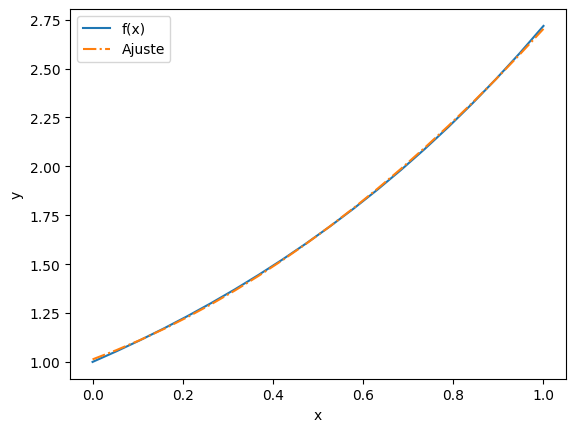

In [16]:
#Gráficos da Aproximação da exponencial usando polinômios ortogonais
import matplotlib.pyplot as plt
import numpy as np

def f(x):
  return np.exp(x)

def p1(x):
  return 1

def p2(x):
  return x - 0.5

def p3(x):
  return x*x - x + 1/6

def g(x):
  e = np.exp(1)
  a1 = e - 1
  a2 = 6*(3 - e)
  a3 = 30*(7*e - 19)
  g = a1*p1(x) + a2*p2(x) + a3*p3(x)
  return g

x = np.linspace(0,1,20)
y = f(x)
ya = g(x)

plt.figure(1)
plt.plot(x, y, '-', label='f(x)')
plt.plot(x, ya, '-.', label='Ajuste')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


Exercícios:

1. Aproxime a tabela de dados usando MMQ:

$$\begin{array}{c|ccccc}
x_i & -2 & -1 & 1 & 2\\
\hline
y_i & 1 & -3 & 1 & 9 \\
\end{array}$$

com as funções aproximadoras $g(x) = a_0 x + a_1x^2$ e $h(x)=a_0 + a_1x^2$. Qual função oferece a melhor aproximação?

2. Aproxime a função $f(x)=3-x$ por $g(x)=a_1+a_2\dfrac{1}{x}$, usando MMQ, no intervalo $[1,2]$.

In [17]:
#Execício 1: (Aula 18/10)

In [18]:
#Exercício 2: (Aula 18/10)

**Análise Harmônica / Aproximação de Fourier**:

Quando a função é periódica é conveniente também usarmos funções periódicas de mesmo período para aproximá-la.

(a) Domínio contínuo:

Uma função periódica de período T, satisfaz $f(x+T)=f(x)$. Exemplos: $\sin(x)$ e $\cos(x)$ são funções periódicas com $T=2\pi$.

Nesse caso, vamos considerar a função aproximadora:

$$g(x)=a_0+\sum_{k=1}^n[a_k\cos(k x)+b_k\sin(k x)]$$

Assim, nosso problema de mínimos quadrado é determinar os parâmetros $a_k$ e $b_k$ que minimizem a função
$$\int_0^{2\pi}[f(x)-g(x)]^2dx.$$

As funções $1,\cos(x),\cos(2x),\ldots,\cos(n x),\sin(x),\sin(2x),\ldots,\sin(nx)$ são ortogonais em relação ao produto interno:
$$<f,g> = \int_c^{c+2\pi}f(x)g(x)dx.$$

Portanto, o sistema norma obtido pelo MMQ, resulta em uma matriz diagonal e os coeficientes são dados por:

$$a_0 = \dfrac{<f,1>}{<1,1>} \Longrightarrow a_0=\dfrac{1}{2\pi}\int_0^{2\pi}f(x)dx$$

$$a_k = \dfrac{<f,\cos(k x)>}{<\cos(k x),\cos(k x)>} \Longrightarrow a_k=\dfrac{1}{\pi}\int_0^{2\pi}f(x)\cos(k x)dx$$

$$b_k = \dfrac{<f,\sin(k x)>}{<\sin(k x),\sin(k x)>} \Longrightarrow b_k=\dfrac{1}{\pi}\int_0^{2\pi}f(x)\sin(k x)dx$$

*Exemplo 5:*

Fazer a análise harmônica da função $f(t)$ periódica de periodo $T=2$, até o harmônico de terceira ordem.

$$f(t) = \begin{cases}
1, \mbox{ se } t\in[0,1],\\
-1, \mbox{ se } t\in[1,2]
\end{cases}$$

O primeiro fato a ser observado é que o período de $f$ é diferente do período $2\pi$. Assim, precisamos fazer uma mudança de variável,
$$t(x) = \dfrac{T}{2\pi}x.$$

Segundo fato, a função $f(t)$ é ímpar.

**Obs.** Resolução em sala!

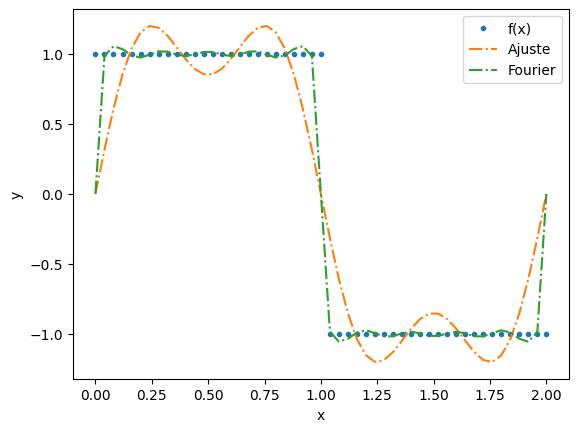

In [19]:
#Gráficos da análise de Fourier feita em aula
import numpy as np

def f(x):
    y = 1
    if(x > 1):
        y = -1
    return y

#Até o terceiro harmônico
def g(x):
    g = (4/np.pi)*np.sin(np.pi*x) + (4/(3*np.pi))*np.sin(3*np.pi*x)
    return g

def gf(x, n):
    soma = 0
    for i in range(n):
        g = 4/((2*i+1)*np.pi)*np.sin((2*i+1)*np.pi*x)
        soma += g
    return soma

x = np.linspace(0,2,51)
y = []
for i in range(len(x)):
    z = f(x[i])
    y.append(z)
ya = g(x)
ys = gf(x, 20)

plt.figure(1)
plt.plot(x, y, '.', label='f(x)')
plt.plot(x, ya, '-.', label='Ajuste')
plt.plot(x, ys, '-.', label='Fourier')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()



(b) Domínio discreto:

As funções $1,\cos(x),\cos(2x),\ldots,\cos(Nx),\sin(x),\sin(2x),\ldots,\sin(Nx)$ são ortogonais em relação ao produto escalar $\displaystyle{<f,g> = \sum_{j=1}^{2N}f(x_j)g(x_j)}$,sobre o conjunto de pontos $\displaystyle{x_j=\dfrac{\pi j}{N},j=1,2,\ldots,2N}$. Desta forma, se $f$ é tabelada em $2N$ pontos equidistantes podemos aproximá-la pela a função aproximadora:

$$g(x)=a_0+\sum_{k=1}^n[a_k\cos(k x)+b_k\sin(k x)].$$
Usando o MMQ para determinar os coeficientes $a_k$ e $b_k$, obtemos um sistema diagonal, com a solução dada por:

$$a_0 = \dfrac{<f,1>}{<1,1>} \Longrightarrow a_0=\dfrac{1}{2N}\sum_{j=1}^{2N}f(x_j)$$

$$a_k = \dfrac{<f,\cos(k x)>}{<\cos(k x),\cos(k x)>} \Longrightarrow a_k=\dfrac{1}{N}\sum_{j=1}^{2N}f(x_j)\cos(k \frac{\pi}{N}j), \mbox{ com } 1\le k < N,$$

$$b_k = \dfrac{<f,\sin(k x)>}{<\sin(k x),\sin(k x)>} \Longrightarrow b_k=\dfrac{1}{N}\sum_{j=1}^{2N}f(x_j)\sin(k \frac{\pi}{N}j), \mbox{ com } 1\le k < N$$

$$a_N = \dfrac{<f,\cos(N x)>}{<\cos(N x),\cos(N x)>} \Longrightarrow a_N=\dfrac{1}{2N}\sum_{j=1}^{2N}f(x_j)\cos(\pi j).$$

*Exemplo 6:*

Fazer a análise harmônica, até o primeiro harmônico da função tabelada.

$$\begin{array}{c|c|c|c|c}
j & 1 & 2 & 3 & 4 \\
\hline
f(x_j) & 3 & 5 & 7 & 6\\
\end{array}$$

Ou seja, determinar a aproximação $g(x) = a_0 + a_1\cos(x) + b_1\sin(x)$ via MMQ.

*Solução:*

Nesse caso, temos $2N = 4$, portanto $N=2$ e os coeficientes são dados por:

$$a_0 = \dfrac{\sum_{j=1}^4f(x_j)}{4}=\dfrac{21}{4},$$

$$a_1 = \dfrac{1}{2}[3\cos(\dfrac{\pi}{2})+5\cos(\dfrac{2\pi}{2})+7\cos(\dfrac{3\pi}{2})+6\cos(\dfrac{4\pi}{2})]=\dfrac{1}{2},$$

$$b_1 = \dfrac{1}{2}[3\sin(\dfrac{\pi}{2})+5\sin(\dfrac{2\pi}{2})+7\sin(\dfrac{3\pi}{2})+6\sin(\dfrac{4\pi}{2})]=-2,$$


[5.25, 0.49999999999999956, -2.0000000000000004]


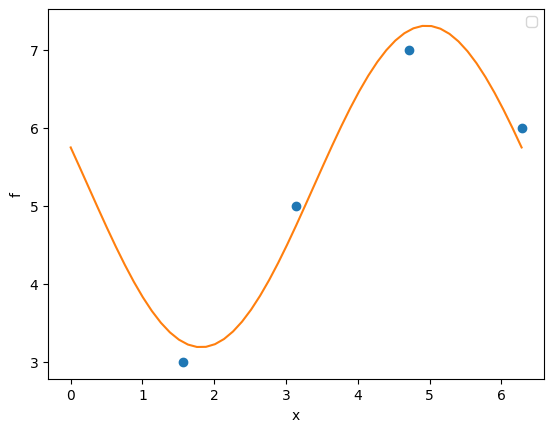

In [20]:
import numpy as np

def g(a, x):
    return a[0] + a[1]*np.cos(x) + a[2]*np.sin(x)

# Tabela de valores:
j = [1, 2, 3, 4]
fj = [3, 5, 7, 6]
m = len(fj)
n = m//2

x = []
soma = 0

# Calcular xj:
for i in range(m):
    soma += fj[i]
    x.append((i+1)*np.pi/2)

a0 = soma/m
a1 = 0
b1 = 0

# Calcular a1 e b1:
for i in range(m):
    a1 += fj[i]*np.cos((i+1)*np.pi/n)
    b1 += fj[i]*np.sin((i+1)*np.pi/n)
a1 = a1/2
b1 = b1/2

a = [a0, a1, b1]
print("{}".format(a))

xc = np.linspace(0,2*np.pi,51)
yc = g(a, xc)

plt.figure(1)
plt.plot(x, fj, 'o', label='Experimento')
plt.plot(xc, yc, label='Ajuste')
plt.xlabel("x")
plt.ylabel("f")
plt.legend('')
plt.show()



**Mínimos Quadrados não lineares**

As funções usadas na apsoximação são não lineares nos parâmetros.

Por exemplo, funções racionais, hiperbólicas, exponenciais, como,

$$g(x) = a_1\exp(-\dfrac{(a_2-x)^2}{a_3})+a_4\exp(-\dfrac{(a_5-x)^2}{a_6}).$$

A ideia continua a mesma, minimizar a soma dos quadrados dos resíduos. A diferença é que podemos ter dois caminhos:


*   Se for possível, podemos lienarizar a função aproximadora, resolver o problema linear e depois retornar aos parâmetros originais.
*  Resolver um sistema não linear.

*Exemplo 7:*

1.  Como fazer para aproximar uma função $f$ por uma função $g(x) = a_0\exp(-{a_1x})$?

Note que aplicando $\ln$ em ambos os lados, $g(x) = a_0\exp(-a_1 x) \Longrightarrow \ln(g(x)) = \ln(a_0) - a_1x$. Fazendo $\alpha_0=\ln(a_0)$ e $\alpha_1= - a_1$ temos um problema linear, um ajuste por uma reta, $\ln(y)\approx \alpha_0 + \alpha_1x$. Obtidos $\alpha_0$ e $\alpha_1$ usamos a transformação para obter $a_0$ e $a_1$.

**Obs.** Resolução  em sala!




Matriz A:
[[8.   0.3 ]
 [0.3  3.59]]

Matriz b:
[ 8.03863399 -8.64613682]

Solução do sistema linear:
[ 1.09858669 -2.50019856]

resíduo = 
 1.2940853773085555e-06


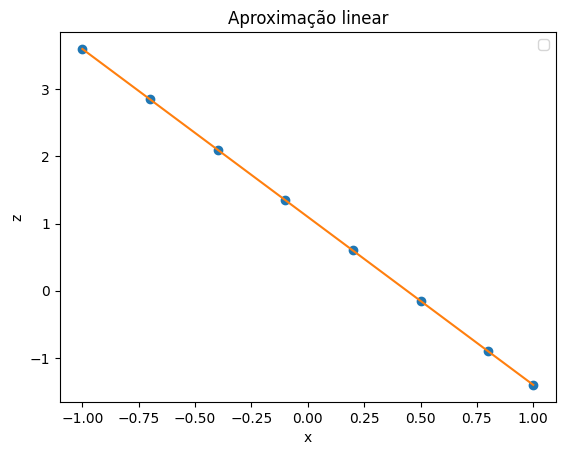

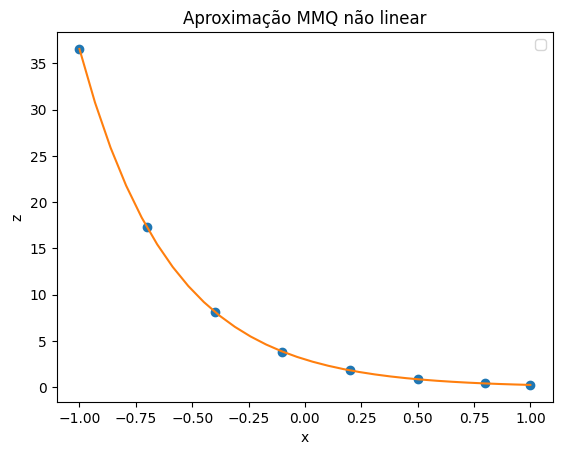

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

# Exemplo de MMQ não linear usando a técnica de linearização

def fnlinear(x, a):
    y = a[0]*np.exp(-a[1]*x)
    return y

def flinear(x, a):
    y = a[0] + a[1]*x
    return y

def rlinear(a, x, y):
    return flinear(x, a) - y

# "Tabela" com x, y, e log(y)
x = np.array([-1, -0.7, -0.4, -0.1, 0.2, 0.5, 0.8, 1])
y = np.array([36.547, 17.264, 8.155, 3.852, 1.82, 0.86, 0.406, 0.246])
z = np.log(y)

m = len(x)

# Sistema para o ajuste por reta
A = np.zeros((2,2))
b = np.zeros(2)

a0 = a1 = a2 = b1 = b2 = 0

for i in range(m):
  a0 += 1
  a1 += x[i]
  a2 += x[i]**2
  b1 += z[i]
  b2 += x[i]*z[i]
A[0,0] = a0
A[1,0] = a1
A[0,1] = a1
A[1,1] = a2
b[0] = b1
b[1] = b2
print("Matriz A:\n{}\n".format(A))
print("Matriz b:\n{}\n".format(b))
# Solucionar o sistema
a = np.linalg.solve(A, b)
print("Solução do sistema linear:\n{}\n".format(a))
res = 0
# Cálculo do resíduo
for i in range(m):
   res += (rlinear(a, x[i], z[i])**2)
print("resíduo = \n", res)
alpha = [np.exp(a[0]), -a[1]]

xc = np.linspace(x[0], x[m-1], 30)
zc = flinear(xc, a)
yc = fnlinear(xc, alpha)
# Gráfico da aproximação linear:
plt.figure(1)
plt.plot(x, z, 'o', label='Experimento')
plt.plot(xc, zc, label='Ajuste')
plt.title("Aproximação linear")
plt.xlabel("x")
plt.ylabel("z")
plt.legend('')
plt.show()

# Gráfico da aproximação não linear
plt.figure(2)
plt.plot(x, y, 'o', label='Experimento')
plt.plot(xc, yc, label='Ajuste')
plt.title("Aproximação MMQ não linear")
plt.xlabel("x")
plt.ylabel("z")
plt.legend('')
plt.show()

Algumas outras transformações que podem auxiliar no processo de linearização:

1.   $$y=\dfrac{1}{a_1+a_2x}\Longrightarrow \mbox{ Se } y \neq 0, \dfrac{1}{y} = a_1 + a_2 x,$$
2.   $$y=a_1a_2^x\Longrightarrow \mbox{ Se } y> 0, \ln(y) = \ln(a_1) + \ln(a_2) x$$
3.   $$y=a_1x^{a_2} \Longrightarrow \mbox{ Se } x>0 \mbox{ e } y>0, \ln(y) = \ln(a_1) + a_2 \ln(x)$$

A seguir um exemplo, de MMQ não linear com a resolução de um sistema não linear.

**Aplicação: Curva de polarização**

Para o ajuste da curva de polarização por meio da função não linear é necessário obter os parâmetros ${\bf a}$ da função,
$$ f(x,{\bf a})= a_0 - a_1x - a_2\ln\left(\frac{x}{a_3} + 1\right) - a_4\exp(a_5x).$$

Nosso objetivo, obter os parâmetros por meio do método dos mínimos quadrados, que minimizam a função,

$$  r({\bf a}) = \dfrac{1}{2}\sum_{i=1}^m r_i({\bf a})^2,$$

sendo o resíduo $r_i({\bf a}) = f(x_i,{\bf a}) - y_i$, com $(x_i,y_i)$ dados e $m$ tamanho dos vetores $x$ e $y$.



<ipython-input-30-731951fc047e>:14: RuntimeWarning: invalid value encountered in log
  return 0.6795 - a[0]*np.log((x/a[1]) + 1.0) - a[2]*x - a[3]*np.exp(a[4]*x) - y


Parâmetros do ajuste não linear:

a =  0.06394044791068554 3.6724753168700804e-05 50.556498656885665 0.00262803790469458 968.778217571906


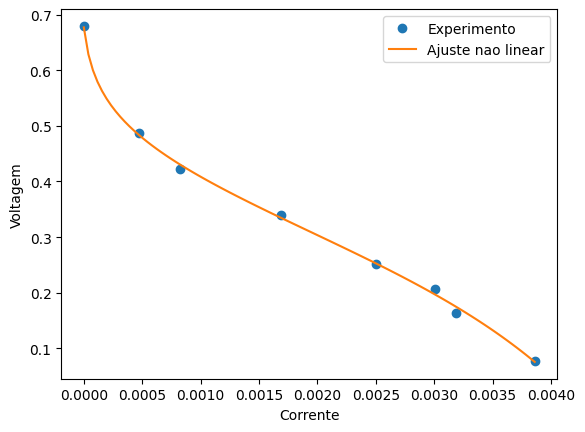

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

def fnlinear(t, a, b, c, d, e, f=0.6795, noise=0, n_outliers=0, random_state=0):
    y = f - a*np.log(t/b + 1.0) - c*t - d*np.exp(e*t)
    return y

def flinear(t, a, b):
    y = a - b*t
    return y

def rnlinear(a, x, y):
    return 0.6795 - a[0]*np.log((x/a[1]) + 1.0) - a[2]*x - a[3]*np.exp(a[4]*x) - y

def rlinear(x, t, y):
    return x[0] - x[1]*t - y

i = np.array([0, 4.75*10**(-4), 8.27*10**(-4), 1.69*10**(-3), 2.5*10**(-3), 3.01*10**(-3), 3.19*10**(-3), 3.86*10**(-3)])
n = len(i)
v = np.array([0.6795, 0.4862, 0.423, 0.33975, 0.25075, 0.2062, 0.1629, 0.07715])

i_min = i[0]
i_max = i[n-1]

x0 = np.array([0.0, 0.05, 100, 0.0, 500.0])

res_lsq = optimize.least_squares(rnlinear, x0, args=(i, v))

print("Parâmetros do ajuste não linear:\n")
print("a = ", *res_lsq.x)

i_test = np.linspace(i_min, i_max, 100)

y_lsq = fnlinear(i_test, *res_lsq.x)

plt.figure(2)
plt.plot(i, v, 'o', label='Experimento')
plt.plot(i_test, y_lsq, label='Ajuste nao linear')
plt.xlabel("Corrente")
plt.ylabel("Voltagem")
plt.legend()
plt.show()